# App dataset with decision trees

In [9]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/decision_trees

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 186 (delta 85), reused 150 (delta 49), pack-reused 0
Receiving objects: 100% (186/186), 34.12 MiB | 19.38 MiB/s, done.
Resolving deltas: 100% (85/85), done.
/content/machine_learning_1/decision_trees/machine_learning_1/decision_trees


In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import utils

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import random
random.seed(0)

In [11]:
app_dataset = pd.DataFrame({
    'Gender': ['Female','Female','Male','Female','Male','Male'],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
app_dataset

,Gender,Age,App
0,Female,15,Snapchat
1,Female,25,SheIn
2,Male,32,Fantasy PL
3,Female,35,SheIn
4,Male,12,Snapchat
5,Male,14,Snapchat


# With age as a categorical feature

In [12]:
app_dataset_one_hot = pd.DataFrame(
    {'Gender_Female':[1,1,0,1,0,0],
     'Gender_Male':[0,0,1,0,1,1],
     'Age_Young':[1,0,0,0,1,1],
     'Age_Old':[0,1,1,1,0,0],
     'App_Snapchat':[1,0,0,0,1,1],
     'App_Fantasy_PL':[0,0,1,0,0,0],
     'App_SheIn':[0,1,0,1,0,0]})
app_dataset_one_hot

,Gender_Female,Gender_Male,Age_Young,Age_Old,App_Snapchat,App_Fantasy_PL,App_SheIn
0,1,0,1,0,1,0,0
1,1,0,0,1,0,0,1
2,0,1,0,1,0,1,0
3,1,0,0,1,0,0,1
4,0,1,1,0,1,0,0
5,0,1,1,0,1,0,0


In [13]:
X = app_dataset_one_hot[['Gender_Female','Gender_Male','Age_Old','Age_Young']]
y = app_dataset_one_hot[['App_Snapchat','App_Fantasy_PL','App_SheIn']]

In [14]:
from sklearn.tree import DecisionTreeClassifier
## TODO ##
# Train a Decision Tree Classifier and print score
dt = DecisionTreeClassifier(random_state=0).fit(X, y)

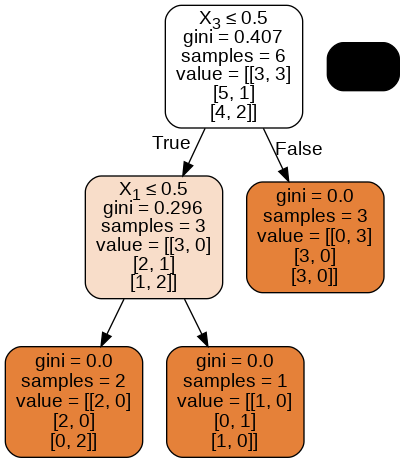

In [17]:
def display_tree(dt):
    import six
    import sys
    sys.modules['sklearn.externals.six'] = six
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


display_tree(dt)


# With age as a numerical feature

In [18]:
app_dataset = pd.DataFrame({
    'Gender_Female':[1,1,0,1,0,0],
    'Gender_Male':[0,0,1,0,1,1],
    'Age': [15, 25, 32, 35, 12, 14],
    'App': ['Snapchat', 'SheIn', 'Fantasy PL', 'SheIn', 'Snapchat', 'Snapchat']})
print(app_dataset)

   Gender_Female  Gender_Male  Age         App
0              1            0   15    Snapchat
1              1            0   25       SheIn
2              0            1   32  Fantasy PL
3              1            0   35       SheIn
4              0            1   12    Snapchat
5              0            1   14    Snapchat


In [19]:
features = app_dataset[['Age','Gender_Female','Gender_Male']]
print(features)

   Age  Gender_Female  Gender_Male
0   15              1            0
1   25              1            0
2   32              0            1
3   35              1            0
4   12              0            1
5   14              0            1


In [20]:
labels = app_dataset['App']
print(labels)

0      Snapchat
1         SheIn
2    Fantasy PL
3         SheIn
4      Snapchat
5      Snapchat
Name: App, dtype: object


In [21]:
app_model = DecisionTreeClassifier()
app_model.fit(features, labels)
app_model.score(features, labels)

1.0

In [25]:
## TODO ##
# predict
# A girl aged 13
first_pred = app_model.predict([[13, 1, 0]])
print("A girl aged 13 prediction is:", first_pred[0])
# A woman aged 28
second_pred = app_model.predict([[28, 1, 0]])
print("A woman aged 28 prediction is:", second_pred[0])

# A man aged 34
third_pred = app_model.predict([[34, 0, 1]])
print("A man aged 34 prediction is:", third_pred[0])

print()

A girl aged 13 prediction is: Snapchat
A woman aged 28 prediction is: SheIn
A man aged 34 prediction is: Fantasy PL



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


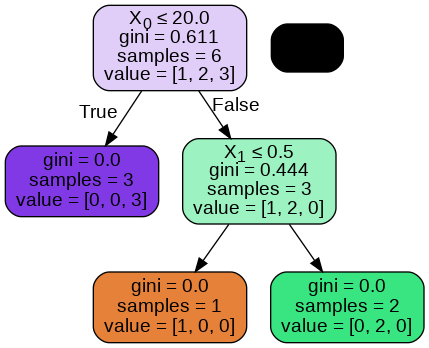

In [26]:
utils.display_tree(app_model)

# Decision trees for regression

In [27]:
features = [[10],[20],[30],[40],[50],[60],[70],[80]]
labels = [7,5,6,0,1,0,4,3]

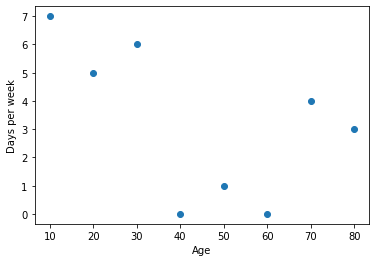

In [28]:
plt.scatter(features, labels)
plt.xlabel("Age")
plt.ylabel("Days per week")
plt.show()

In [32]:
# use Decision Tree for Regreesion to fit tha data
# use depth = 2
dt_regressor = DecisionTreeRegressor(random_state = 0, max_depth=2).fit(features, labels)

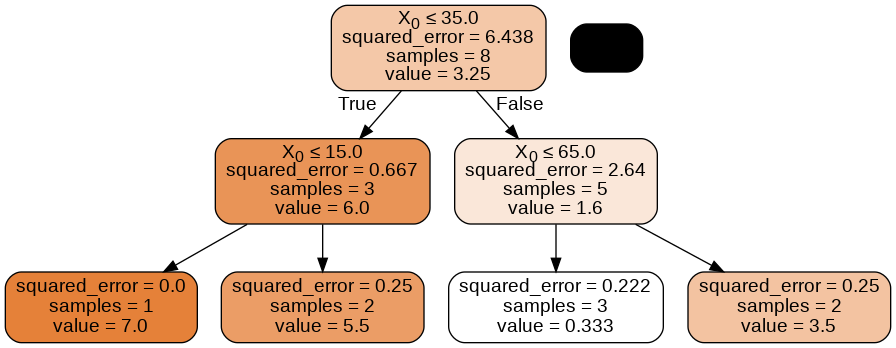

In [33]:
utils.display_tree(dt_regressor)

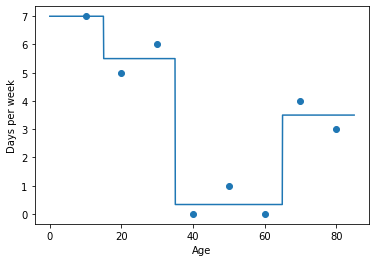

In [34]:
utils.plot_regressor(dt_regressor, features, labels)